# Exercise 1
Dorothea Mueller

# Configurations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

%matplotlib inline

# 1. Frequency Content of Natural Images and Fourier Transform

## 1.

In [2]:
# (i)
# TODO: between 0 and 1?
v = np.random.random(500)
v

array([4.58148711e-01, 9.27817289e-01, 6.24330394e-01, 6.49926055e-01,
       9.39213049e-01, 9.15848894e-01, 5.09330331e-01, 3.19658343e-01,
       4.07362247e-01, 7.64486817e-01, 7.24347915e-01, 3.31483771e-01,
       9.98485427e-01, 7.60919592e-01, 8.91372262e-01, 5.95850274e-01,
       5.28736477e-01, 9.94266997e-01, 2.72691090e-01, 2.48875119e-01,
       8.18009896e-01, 1.06904158e-01, 2.94855241e-01, 8.54917742e-01,
       4.32749814e-01, 7.51216593e-03, 1.78583163e-01, 9.59688890e-01,
       3.77238357e-01, 8.83603591e-01, 4.34667870e-01, 8.29955944e-01,
       8.97944852e-01, 9.84680992e-01, 3.25600781e-01, 1.88105801e-01,
       6.75401687e-01, 6.20964024e-01, 5.02140374e-01, 8.86467995e-01,
       1.81550939e-01, 3.41548365e-01, 9.68368279e-01, 2.21827098e-01,
       6.75665654e-01, 8.49975151e-01, 8.34254020e-01, 1.33893240e-01,
       9.06346505e-02, 9.32854832e-01, 7.72977230e-01, 2.77221229e-01,
       9.54852616e-01, 5.04037975e-01, 4.73162804e-02, 6.16973171e-01,
      

In [3]:
# Fourier transform.
v = np.fft.fft(v)
v

array([ 2.45932688e+02+0.00000000e+00j,  2.36760188e+00+2.06790920e+00j,
       -1.09246200e+00-2.66128551e+00j,  1.72139750e+00-3.82545509e+00j,
        1.92284826e+00-5.04258088e+00j,  6.48510106e+00-3.75314797e+00j,
        1.37564252e+00-1.10383852e+01j, -5.13803855e+00-6.98436461e+00j,
        6.38763040e+00+2.79881545e+00j, -8.67957992e-01+7.45853492e+00j,
       -1.23393922e+00-3.21868855e+00j,  2.69800581e+00-6.57752950e+00j,
        8.76953815e+00+1.26487954e+00j,  4.41220338e+00+9.59047850e-01j,
       -6.49047222e+00-4.82230594e+00j,  5.38613899e+00-1.35536179e+00j,
        3.14221454e+00-1.38865280e+00j,  1.14154380e+00-1.85639590e+00j,
       -6.03857241e+00-7.39234400e-01j, -1.17337217e+01-1.05788883e+00j,
        4.62535915e+00-5.38129941e-01j,  3.21667082e+00+2.29950881e-01j,
        2.58609575e-02-2.44383829e+00j, -1.54529931e+00-4.77497061e+00j,
       -6.26387471e+00+7.60416299e-01j, -2.43890530e+00+1.79549230e+00j,
       -2.16513272e+00+6.92429800e+00j, -6.55813598

# 2. "Natural Input" for the Cell in the Early Visual System

### 1.

(1000, 1000)

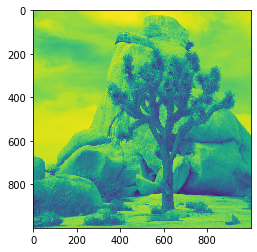

In [4]:
path = "./natural/natural1.png"

img = imread(path)
plt.imshow(img)
img.shape

### 2.

In [76]:
def extract_patch(img, l_x, l_y, x, y):
    """Extract patches from the img from position x, y with length l_x and l_y, respectively."""
    x_half = l_x//2
    y_half = l_y//2
    
    # Cave. Assuming x should be the horizontal direction and y the vertical,
    # the accesses has to be img[y, x].
    return img[y-y_half:y+y_half, x-x_half:x+x_half]

In [77]:
def x_in_border(img, x, x_half):
    return x + x_half < img.shape[1] and x - x_half > 0

def y_in_border(img, y, y_half):
    return y + y_half < img.shape[0] and y - y_half > 0

In [80]:
def extract_patch(img, l_x, l_y, x, y):
    """Extract patches from the img from position x, y with length l_x and l_y, respectively."""
    x_half = l_x//2
    y_half = l_y//2
    
    print(x_in_border(img, x, x_half))
    print(y_in_border(img, y, y_half))
    
    if not x_in_border(img, x, x_half):
        return None
    if not y_in_border(img, y, y_half):
        return None
    
    # Cave. Assuming x should be the horizontal direction and y the vertical,
    # the accesses has to be img[y, x].
    return img[y-y_half:y+y_half, x-x_half:x+x_half]

True
True
(100, 10)


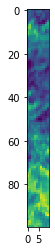

False
True


In [81]:
extracted = extract_patch(img, 10, 100, 400, 850)
print(extracted.shape)
plt.imshow(extracted)
plt.show()

extracted = extract_patch(extracted, 4, 0, 100, 50)

(200, 200)


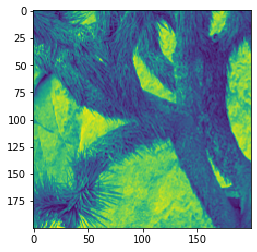

(100, 10)


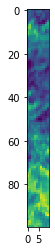

(100, 0)


/home/dorothea/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  


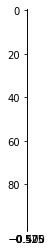

In [18]:
# Testing
extracted = extract_patch(img, 200, 200, 500, 500)
print(extracted.shape)
plt.imshow(extracted)
plt.show()

extracted = extract_patch(img, 10, 100, 400, 850)
print(extracted.shape)
plt.imshow(extracted)
plt.show()

extracted = extract_patch(img, 100, 100, 50000, 500)
print(extracted.shape)
plt.imshow(extracted)
plt.show()

### 3. Micro-Saccades

In [7]:
l_x = 25
l_y = 25
n_saccades = 10

In [8]:
# position = (500, 500) # TODO: random
# sequence_positions = []
# plt.subplots(2, 5)

# for i in range(n_saccades):
#     # New positions.
#     x, y = position
#     ch_x, ch_y = np.random.normal(0, 4, 2)
#     x+= int(ch_x) # Cast to pixels.
#     y+= int(ch_y)
#     sequence_positions.append((x, y))
    
#     # Extract image.
#     extr_img = extract_patch(img, l_x, l_y, x, y)
#     plt.subplots(211)
#     plt.imshow(extr_img)
#     plt.show()
#     print(ch_x, ch_y)
#     # TODO: return none if sampled point not within pictures

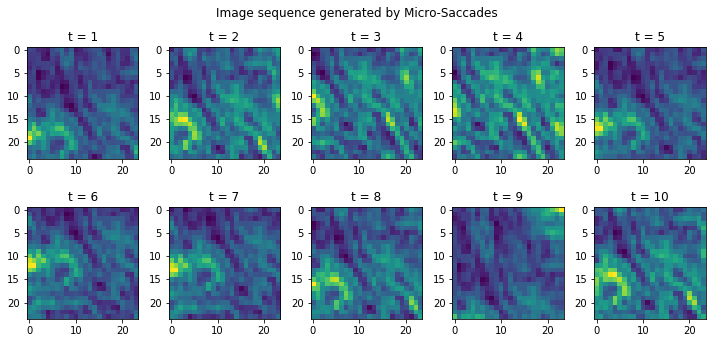

In [9]:
position = (500, 500) # TODO: random
sequence_positions = []
fig, axs = plt.subplots(2, 5, figsize = (10, 5))

for i, ax in enumerate(axs.flat):
    # New positions.
    x, y = position
    ch_x, ch_y = np.random.normal(0, 4, 2)
    x+= int(ch_x) # Cast to pixels.
    y+= int(ch_y)
    sequence_positions.append((x, y))
    
    # Extract image.
    extr_img = extract_patch(img, l_x, l_y, x, y)
    ax.imshow(extr_img)
    ax.set_title(f"t = {i + 1}")
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')

plt.suptitle("Image sequence generated by Micro-Saccades")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


In [10]:
# Sequence was used with by generating following jumps:
sequence_positions

[(498, 496),
 (502, 498),
 (505, 503),
 (507, 503),
 (497, 498),
 (497, 503),
 (497, 502),
 (500, 498),
 (499, 489),
 (501, 499)]

### 4. Saccades

In [11]:
## TODO. Also make extract image check whether arrayoutofboundaries condition is made (then return None, sample as long as it is None).

### 5. Comparison Micro-Saccades and Saccades

Observation

### 6. Different Natural Image.

In [12]:
## TODO: make the above as functions.